In [1]:
# Parameters (overriden by papermill)
DATASET = 'long-linkers-enh'

In [2]:
# Parameters
DATASET = "long-linkers-prom"


In [3]:
import itertools

In [4]:
# This should be the same as in 02 notebook

plot_combinations = {}

if DATASET == 'long-linkers-enh':
    
    for experiment, linker in itertools.product(
        ['H3K4me1', 'H3K27ac', 'H3K4me1K27ac'],
        ['200bp_scr', '200bp_SV40enh'],
    ):
        plot_combinations[experiment, linker, '1'] = 'H3unmod', '50bp'
        
        
    for experiment, linker in itertools.product(
        ['H3K4me1', 'H3K27ac', 'H3K4me1K27ac'],
        ['200bp_SV40enh'],
    ):
        plot_combinations[experiment, linker, '2'] = 'H3unmod', '200bp_scr'
              
elif DATASET == 'long-linkers-prom':
    
    for experiment, linker in itertools.product(
        ['Promoter_PTMs'],
        ['200bp_scr', '200bp_SV40prom'],
    ):
        plot_combinations[experiment, linker, '1'] = 'unmodH3_unmodH4', '50bp'
        
    for experiment, linker in itertools.product(
        ['Promoter_PTMs',],
        ['200bp_SV40prom'],
    ):
        plot_combinations[experiment, linker, '2'] = 'unmodH3_unmodH4', '200bp_scr'
        
    
elif DATASET == 'short-linkers':
    
    for experiment, linker in itertools.product(
        ['H3K27me3', 'H3K9me3'],
        ['35bp', '40bp', '45bp', '55bp'],
    ):
        plot_combinations[experiment, linker, '1'] = 'H3unmod', '50bp'
    

In [5]:
# What is treated as significant 
SIGNIFICANT_COL = 'significant_with_large_log2fc'

In [6]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
sns.set_palette('Dark2')
sns.set_context('paper')
sns.set_style({'axes.axisbelow': True, 
               'axes.edgecolor': '.15',
               'axes.facecolor': 'white',
               'axes.grid': True, 
               'axes.labelcolor': '.15', 
               'figure.facecolor': 'white', 
               'grid.color': '.15',
               'grid.linestyle': ':', 
               'grid.alpha': .5, 
               'image.cmap': 'Greys', 
               'legend.frameon': False, 
               'legend.numpoints': 1, 
               'legend.scatterpoints': 1,
               'lines.solid_capstyle': 'butt', 
               'axes.spines.right': False, 
               'axes.spines.top': False,  
               'text.color': '.15',  
               'xtick.top': False, 
               'ytick.right': False, 
               'xtick.color': '.15',
               'xtick.direction': 'out', 
               'ytick.color': '.15', 
               'ytick.direction': 'out', 
              })


import matplotlib

FONT_SIZE_PT = 5
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = FONT_SIZE_PT
matplotlib.rcParams['axes.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['axes.titlesize'] = FONT_SIZE_PT
matplotlib.rcParams['figure.titlesize'] = FONT_SIZE_PT
matplotlib.rcParams['xtick.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['ytick.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['legend.fontsize'] = FONT_SIZE_PT
matplotlib.rcParams['legend.title_fontsize'] = FONT_SIZE_PT

matplotlib.rcParams['xtick.major.size'] = matplotlib.rcParams['ytick.major.size'] = 2
matplotlib.rcParams['xtick.major.width'] = matplotlib.rcParams['ytick.major.width'] = 0.5


matplotlib.rcParams['xtick.minor.size'] = matplotlib.rcParams['ytick.minor.size'] = 1

matplotlib.rcParams['xtick.minor.width'] = matplotlib.rcParams['ytick.minor.width'] = 0.5

matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['grid.linewidth'] = 0.25
matplotlib.rcParams['patch.linewidth'] = 0.25
matplotlib.rcParams['lines.markeredgewidth'] = 0.25
matplotlib.rcParams['lines.markersize'] = 2

FIVE_MM_IN_INCH = 0.19685
DPI = 600
matplotlib.rcParams['figure.figsize'] = (10 * FIVE_MM_IN_INCH, 9 * FIVE_MM_IN_INCH)
matplotlib.rcParams['savefig.dpi'] = DPI
matplotlib.rcParams['figure.dpi'] = DPI // 4


#http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [7]:
import pathlib

INPUT_EXCEL_RESULTS_CSV = pathlib.Path('outputs') / '03-excel-output' / DATASET / f'01-model-results.{DATASET}.csv.gz'
assert INPUT_EXCEL_RESULTS_CSV.is_file()

In [8]:
OUTPUT_DIRECTORY = pathlib.Path('outputs') / '04-plots' / DATASET

if not OUTPUT_DIRECTORY.is_dir():
    OUTPUT_DIRECTORY.mkdir(parents=True)

Parse data from excel

In [9]:
data = pd.read_csv(INPUT_EXCEL_RESULTS_CSV, index_col=0)
data.columns = pd.MultiIndex.from_tuples(x.split('___') for x in data.columns)

In [10]:
data

metadata                    \
          Label Accession    Gene   
Label                               
TPX2       TPX2    Q9ULW0    TPX2   
BCORL1   BCORL1    Q5H9F3  BCORL1   
SETD5     SETD5    Q9C0A6   SETD5   
PWWP2B   PWWP2B    Q6NUJ5  PWWP2B   
GAS2L3   GAS2L3    Q86XJ1  GAS2L3   
...         ...       ...     ...   
KRT3       KRT3    P12035    KRT3   
KRT31     KRT31    Q15323   KRT31   
ANXA1     ANXA1    P04083   ANXA1   
PRKACA   PRKACA    P17612  PRKACA   
ADD3       ADD3    Q9UEY8    ADD3   

                                                                        \
                                              Description # AAs # PSMs   
Label                                                                    
TPX2    Targeting protein for Xklp2 OS=Homo sapiens OX...   747     23   
BCORL1  BCL-6 corepressor-like protein 1 OS=Homo sapie...  1785    600   
SETD5   Histone-lysine N-methyltransferase SETD5 OS=Ho...  1442     10   
PWWP2B  PWWP domain-containing protein 2B OS=Homo sapi...   590      8   
GAS2L3  GAS2-like protein 3 OS=Homo sapiens OX=9606 GN...   694      5   
...                                                   ...   ...    ...   
KRT3    Keratin, type II cytoskeletal 3 OS=Homo sapien...   628    258   
KRT31   Keratin, type I cuticular Ha1 OS=Homo sapiens ...   416     96   
ANXA1   Annexin A1 OS=Homo sapiens OX=9606 GN=ANXA1 PE...   346      2   
PRKACA  cAMP-dependent protein kinase catalytic subuni...   351      3   
ADD3    Gamma-adducin OS=Homo sapiens OX=9606 GN=ADD3 ...   706      2   

                                                                           \
       # Peptides # Peptides (by Search Engine): Mascot # Unique Peptides   
Label                                                                       
TPX2           10                                    10                10   
BCORL1         57                                    57                56   
SETD5           3                                     3                 3   
PWWP2B          5                                     5                 5   
GAS2L3          2                                     2                 2   
...           ...                                   ...               ...   
KRT3           16                                    16                 3   
KRT31           9                                     9                 2   
ANXA1           2                                     2                 2   
PRKACA          2                                     2                 2   
ADD3            2                                     2                 2   

                     ...                 raw_data  \
       Coverage [%]  ... Promoter_PTMs_50bp_repl3   
Label                ...                            
TPX2             14  ...             7.789370e+06   
BCORL1           40  ...             9.297918e+07   
SETD5             3  ...             3.950516e+06   
PWWP2B            8  ...             6.688192e+06   
GAS2L3            5  ...             2.142189e+07   
...             ...  ...                      ...   
KRT3             17  ...                      NaN   
KRT31            24  ...                      NaN   
ANXA1             8  ...                      NaN   
PRKACA            8  ...                      NaN   
ADD3              3  ...                      NaN   

                                             \
       unmodH3_unmodH4_200bp_SV40prom_repl1   
Label                                         
TPX2                           5.901518e+06   
BCORL1                         2.509175e+07   
SETD5                          1.404246e+06   
PWWP2B                                  NaN   
GAS2L3                         1.543627e+06   
...                                     ...   
KRT3                                    NaN   
KRT31                                   NaN   
ANXA1                                   NaN   
PRKACA                                  NaN   
ADD3              

Parse model statistics from the parsed data

In [11]:
data

metadata                    \
          Label Accession    Gene   
Label                               
TPX2       TPX2    Q9ULW0    TPX2   
BCORL1   BCORL1    Q5H9F3  BCORL1   
SETD5     SETD5    Q9C0A6   SETD5   
PWWP2B   PWWP2B    Q6NUJ5  PWWP2B   
GAS2L3   GAS2L3    Q86XJ1  GAS2L3   
...         ...       ...     ...   
KRT3       KRT3    P12035    KRT3   
KRT31     KRT31    Q15323   KRT31   
ANXA1     ANXA1    P04083   ANXA1   
PRKACA   PRKACA    P17612  PRKACA   
ADD3       ADD3    Q9UEY8    ADD3   

                                                                        \
                                              Description # AAs # PSMs   
Label                                                                    
TPX2    Targeting protein for Xklp2 OS=Homo sapiens OX...   747     23   
BCORL1  BCL-6 corepressor-like protein 1 OS=Homo sapie...  1785    600   
SETD5   Histone-lysine N-methyltransferase SETD5 OS=Ho...  1442     10   
PWWP2B  PWWP domain-containing protein 2B OS=Homo sapi...   590      8   
GAS2L3  GAS2-like protein 3 OS=Homo sapiens OX=9606 GN...   694      5   
...                                                   ...   ...    ...   
KRT3    Keratin, type II cytoskeletal 3 OS=Homo sapien...   628    258   
KRT31   Keratin, type I cuticular Ha1 OS=Homo sapiens ...   416     96   
ANXA1   Annexin A1 OS=Homo sapiens OX=9606 GN=ANXA1 PE...   346      2   
PRKACA  cAMP-dependent protein kinase catalytic subuni...   351      3   
ADD3    Gamma-adducin OS=Homo sapiens OX=9606 GN=ADD3 ...   706      2   

                                                                           \
       # Peptides # Peptides (by Search Engine): Mascot # Unique Peptides   
Label                                                                       
TPX2           10                                    10                10   
BCORL1         57                                    57                56   
SETD5           3                                     3                 3   
PWWP2B          5                                     5                 5   
GAS2L3          2                                     2                 2   
...           ...                                   ...               ...   
KRT3           16                                    16                 3   
KRT31           9                                     9                 2   
ANXA1           2                                     2                 2   
PRKACA          2                                     2                 2   
ADD3            2                                     2                 2   

                     ...                 raw_data  \
       Coverage [%]  ... Promoter_PTMs_50bp_repl3   
Label                ...                            
TPX2             14  ...             7.789370e+06   
BCORL1           40  ...             9.297918e+07   
SETD5             3  ...             3.950516e+06   
PWWP2B            8  ...             6.688192e+06   
GAS2L3            5  ...             2.142189e+07   
...             ...  ...                      ...   
KRT3             17  ...                      NaN   
KRT31            24  ...                      NaN   
ANXA1             8  ...                      NaN   
PRKACA            8  ...                      NaN   
ADD3              3  ...                      NaN   

                                             \
       unmodH3_unmodH4_200bp_SV40prom_repl1   
Label                                         
TPX2                           5.901518e+06   
BCORL1                         2.509175e+07   
SETD5                          1.404246e+06   
PWWP2B                                  NaN   
GAS2L3                         1.543627e+06   
...                                     ...   
KRT3                                    NaN   
KRT31                                   NaN   
ANXA1                                   NaN   
PRKACA                                  NaN   
ADD3              

In [12]:
data_model_outputs = data[[c for c in data.columns if c[0].startswith('model_estimates_for')]]
data_model_outputs.columns = pd.MultiIndex.from_tuples([(c[0].partition('model_estimates_for_')[-1], c[1]) for c in data_model_outputs.columns])
data_model_outputs.columns.names = 'Experiment_Linker', 'Statistic'

data_model_outputs

Experiment_Linker linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs  \
Statistic                                            logFC_imputed   
Label                                                                
TPX2                                                     -0.706188   
BCORL1                                                   -0.365697   
SETD5                                                    -0.186105   
PWWP2B                                                   -0.045935   
GAS2L3                                                   -0.043850   
...                                                            ...   
KRT3                                                           NaN   
KRT31                                                          NaN   
ANXA1                                                          NaN   
PRKACA                                                         NaN   
ADD3                                                           NaN   

Experiment_Linker linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4  \
Statistic                                              logFC_imputed   
Label                                                                  
TPX2                                                        0.135675   
BCORL1                                                     -0.273429   
SETD5                                                      -0.575682   
PWWP2B                                                      0.248788   
GAS2L3                                                     -0.664818   
...                                                              ...   
KRT3                                                             NaN   
KRT31                                                            NaN   
ANXA1                                                            NaN   
PRKACA                                                           NaN   
ADD3                                                             NaN   

Experiment_Linker linker_200bp_SV40prom_vs_50bp_Promoter_PTMs  \
Statistic                                       logFC_imputed   
Label                                                           
TPX2                                                -1.109242   
BCORL1                                              -1.710717   
SETD5                                               -1.122651   
PWWP2B                                              -1.376138   
GAS2L3                                              -1.305745   
...                                                       ...   
KRT3                                                      NaN   
KRT31                                                     NaN   
ANXA1                                                     NaN   
PRKACA                                                    NaN   
ADD3                                                      NaN   

Experiment_Linker linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4  \
Statistic                                         logFC_imputed   
Label                                                             
TPX2                                                  -0.093575   
BCORL1                                                -0.508173   
SETD5                                                 -0.847243   
PWWP2B                                                -0.218611   
GAS2L3                                                -1.297098   
...                                                         ...   
KRT3                                                        NaN   
KRT31                                                       NaN   
ANXA1                                                       NaN   
PRKACA                                                      NaN   
ADD3                                                        NaN   

Experiment_Linker linker_200bp_scr_vs_50bp_Promoter_PTMs  \
Statistic                                  logFC_imputed   
Label                                   

In [13]:
normalised_data = data['normalised_data_to_reference_log2']

In [14]:
significance_data = data_model_outputs.loc(axis=1)[:, SIGNIFICANT_COL].droplevel(axis=1,level=1)
significance_data

Experiment_Linker,linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs,linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4,linker_200bp_SV40prom_vs_50bp_Promoter_PTMs,linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4,linker_200bp_scr_vs_50bp_Promoter_PTMs,linker_200bp_scr_vs_50bp_unmodH3_unmodH4,modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom,modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr,modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp
Label,,,,,,,,,
TPX2,False,False,True,False,False,False,False,False,False
BCORL1,False,False,True,False,False,False,False,False,False
SETD5,False,False,True,False,False,False,True,False,True
PWWP2B,False,False,True,False,True,False,False,True,True
GAS2L3,False,False,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...
KRT3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KRT31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANXA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
comments = data.loc[data_model_outputs.index, ('model_estimates', 'comment')]
comments

Label
TPX2                                         NaN
BCORL1                                       NaN
SETD5                                        NaN
PWWP2B                                       NaN
GAS2L3                                       NaN
                           ...                  
KRT3      Insufficient number of non-null values
KRT31     Insufficient number of non-null values
ANXA1     Insufficient number of non-null values
PRKACA    Insufficient number of non-null values
ADD3      Insufficient number of non-null values
Name: (model_estimates, comment), Length: 1600, dtype: object

In [16]:
PALETTE = {
    'Background': '#bdbdbd',
    'Modification responsive': '#BA5047',
    'Linker responsive': '#4B82B6',
    'Modification and linker responsive': '#786D9B',
    'Controls': '#5e5e5e'
}

PALETTE_TEXT = {
    'Background': 'black',
    'Modification responsive': '#BA5047',
    'Linker responsive': '#4B82B6',
    'Modification and linker responsive': '#786D9B',
    'Controls': 'black'
}


PALETTE_EDGES = {
    'background': '#CDCDCD',
    'highlight': '#525252'
}

EDGEWIDTH = 0.35
ALPHA = 0.8

MARKERSIZES = {
    'large': 8,
    'small': 4,
}

AXIS_LINECOLOR = '#969696'

In [17]:
# Special markers
from matplotlib.markers import MarkerStyle

SPECIAL_MARKERS = {
}

SPECIAL_MARKERS['diag-down-left'] = MarkerStyle(marker='<')
SPECIAL_MARKERS['diag-down-left']._transform = SPECIAL_MARKERS['diag-down-left'].get_transform().rotate_deg(45)

SPECIAL_MARKERS['diag-up-right'] = MarkerStyle(marker='^')
SPECIAL_MARKERS['diag-up-right']._transform = SPECIAL_MARKERS['diag-up-right'].get_transform().rotate_deg(-45)

SPECIAL_MARKERS['diag-down-right'] = MarkerStyle(marker='>')
SPECIAL_MARKERS['diag-down-right']._transform = SPECIAL_MARKERS['diag-down-right'].get_transform().rotate_deg(-45)

SPECIAL_MARKERS['diag-up-left'] = MarkerStyle(marker='<')
SPECIAL_MARKERS['diag-up-left']._transform = SPECIAL_MARKERS['diag-up-left'].get_transform().rotate_deg(-45)


In [18]:
def rotate_by_angle(point, theta):
    # https://scipython.com/book/chapter-6-numpy/examples/creating-a-rotation-matrix-in-numpy/
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    
    rotp = R.dot(point)
    return rotp


In [19]:
from collections import defaultdict


In [20]:
DATA_LIMITS = {
    'short-linkers': defaultdict(lambda: [-4, 6]),
    'long-linkers-prom': {
        'modif_response_vs_reference': [-7, 11],
        'linker_response_vs_reference': [-7, 7],
        'modif_vs_linker_response': [-7, 11]
     },
    'long-linkers-enh': defaultdict(lambda: [-4, 4])
}
TICKS = {
    'short-linkers': defaultdict(lambda: [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]),
    'long-linkers-enh': defaultdict(lambda: [-4, -3, -2, -1, 0, 1, 2, 3, 4]),
     'long-linkers-prom': {
        'modif_response_vs_reference': [-7, -5, -3, -1, 0, 1, 3, 5, 7, 9, 11],
        'modif_vs_linker_response': [-7, -5, -3, -1, 0, 1, 3, 5, 7, 9, 11],
        'linker_response_vs_reference': [-7, -5, -3, -1, 0, 1, 3, 5, 7]
     }
}

In [21]:
plot_combinations

{('Promoter_PTMs', '200bp_scr', '1'): ('unmodH3_unmodH4', '50bp'),
 ('Promoter_PTMs', '200bp_SV40prom', '1'): ('unmodH3_unmodH4', '50bp'),
 ('Promoter_PTMs', '200bp_SV40prom', '2'): ('unmodH3_unmodH4', '200bp_scr')}

In [22]:
import textwrap

/usr/local/Caskroom/miniconda/base/envs/marcs-variable-linker-pds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, log2(200bp_scr/50bp) using Promoter_PTMs di-nucl. is plotted. On the y axis log2(Promoter_PTMs/unmodH3_unmodH4) using 200bp_scr linker is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr` or `modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `linker_200bp_scr_vs_50bp_Promoter_PTMs` or `linker_200bp_scr_vs_50bp_unmodH3_unmodH4`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smaller marker sizes indicate effect estimates that

/usr/local/Caskroom/miniconda/base/envs/marcs-variable-linker-pds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, log2(200bp_scr/50bp) using unmodH3_unmodH4 di-nucl. is plotted. On the y axis log2(200bp_scr/50bp) using Promoter_PTMs di-nucl. is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr` or `modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `linker_200bp_scr_vs_50bp_Promoter_PTMs` or `linker_200bp_scr_vs_50bp_unmodH3_unmodH4`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smaller marker sizes indicate effect estimates that were m

/usr/local/Caskroom/miniconda/base/envs/marcs-variable-linker-pds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, log2(Promoter_PTMs/unmodH3_unmodH4) using 50bp linker is plotted. On the y axis log2(Promoter_PTMs/unmodH3_unmodH4) using 200bp_scr linker is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr` or `modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `linker_200bp_scr_vs_50bp_Promoter_PTMs` or `linker_200bp_scr_vs_50bp_unmodH3_unmodH4`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smaller marker sizes indicate effect estimates 

/usr/local/Caskroom/miniconda/base/envs/marcs-variable-linker-pds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, log2(200bp_SV40prom/50bp) using Promoter_PTMs di-nucl. is plotted. On the y axis log2(Promoter_PTMs/unmodH3_unmodH4) using 200bp_SV40prom linker is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom` or `modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `linker_200bp_SV40prom_vs_50bp_Promoter_PTMs` or `linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smaller marker sizes indic

/usr/local/Caskroom/miniconda/base/envs/marcs-variable-linker-pds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, log2(200bp_SV40prom/50bp) using unmodH3_unmodH4 di-nucl. is plotted. On the y axis log2(200bp_SV40prom/50bp) using Promoter_PTMs di-nucl. is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom` or `modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `linker_200bp_SV40prom_vs_50bp_Promoter_PTMs` or `linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smaller marker sizes indicate eff

/usr/local/Caskroom/miniconda/base/envs/marcs-variable-linker-pds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, log2(Promoter_PTMs/unmodH3_unmodH4) using 50bp linker is plotted. On the y axis log2(Promoter_PTMs/unmodH3_unmodH4) using 200bp_SV40prom linker is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom` or `modif_Promoter_PTMs_vs_unmodH3_unmodH4_50bp`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `linker_200bp_SV40prom_vs_50bp_Promoter_PTMs` or `linker_200bp_SV40prom_vs_50bp_unmodH3_unmodH4`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smaller marker sizes indica

/usr/local/Caskroom/miniconda/base/envs/marcs-variable-linker-pds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, log2(200bp_SV40prom/200bp_scr) using Promoter_PTMs di-nucl. is plotted. On the y axis log2(Promoter_PTMs/unmodH3_unmodH4) using 200bp_SV40prom linker is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom` or `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs` or `linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smalle

/usr/local/Caskroom/miniconda/base/envs/marcs-variable-linker-pds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, log2(200bp_SV40prom/200bp_scr) using unmodH3_unmodH4 di-nucl. is plotted. On the y axis log2(200bp_SV40prom/200bp_scr) using Promoter_PTMs di-nucl. is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom` or `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs` or `linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smaller 

/usr/local/Caskroom/miniconda/base/envs/marcs-variable-linker-pds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, log2(Promoter_PTMs/unmodH3_unmodH4) using 200bp_scr linker is plotted. On the y axis log2(Promoter_PTMs/unmodH3_unmodH4) using 200bp_SV40prom linker is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_SV40prom` or `modif_Promoter_PTMs_vs_unmodH3_unmodH4_200bp_scr`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `linker_200bp_SV40prom_vs_200bp_scr_Promoter_PTMs` or `linker_200bp_SV40prom_vs_200bp_scr_unmodH3_unmodH4`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smaller

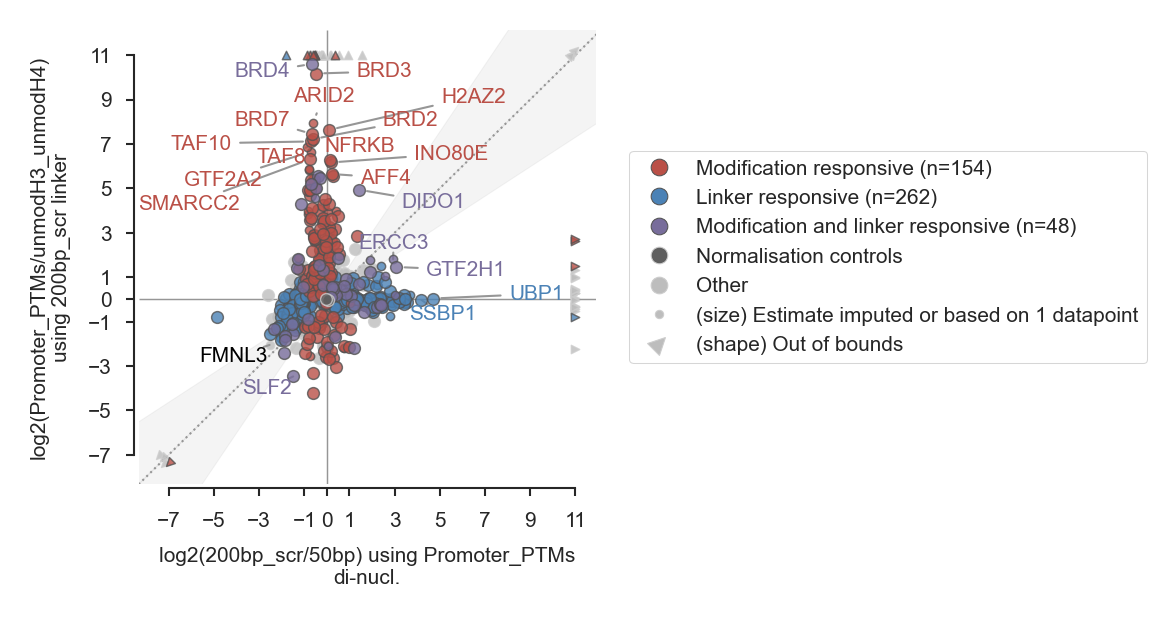

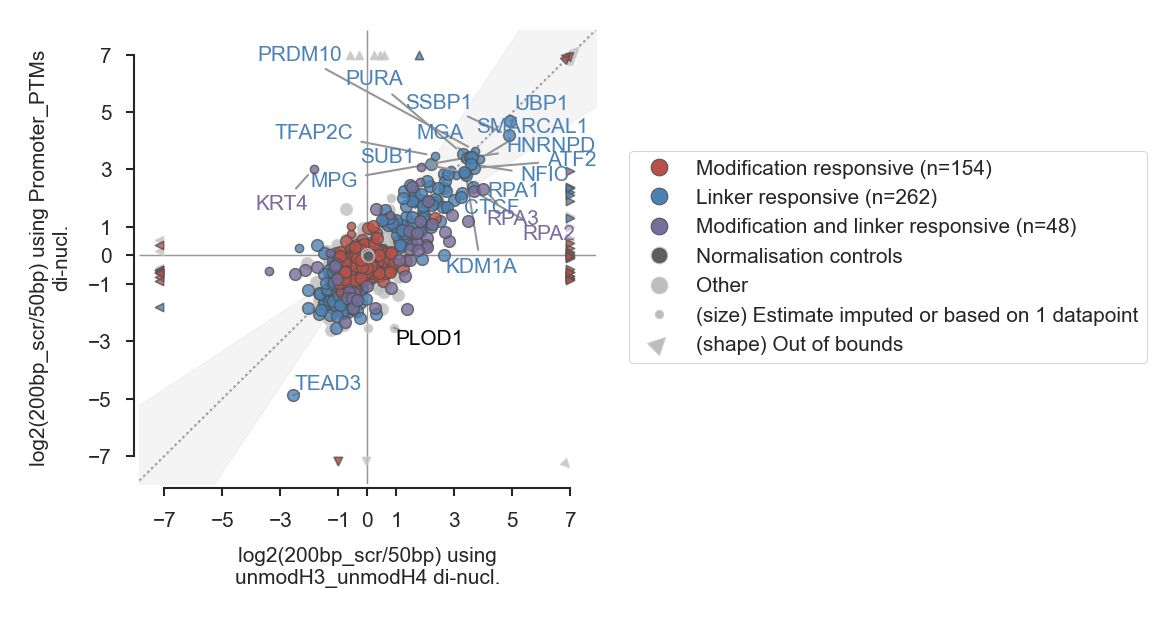

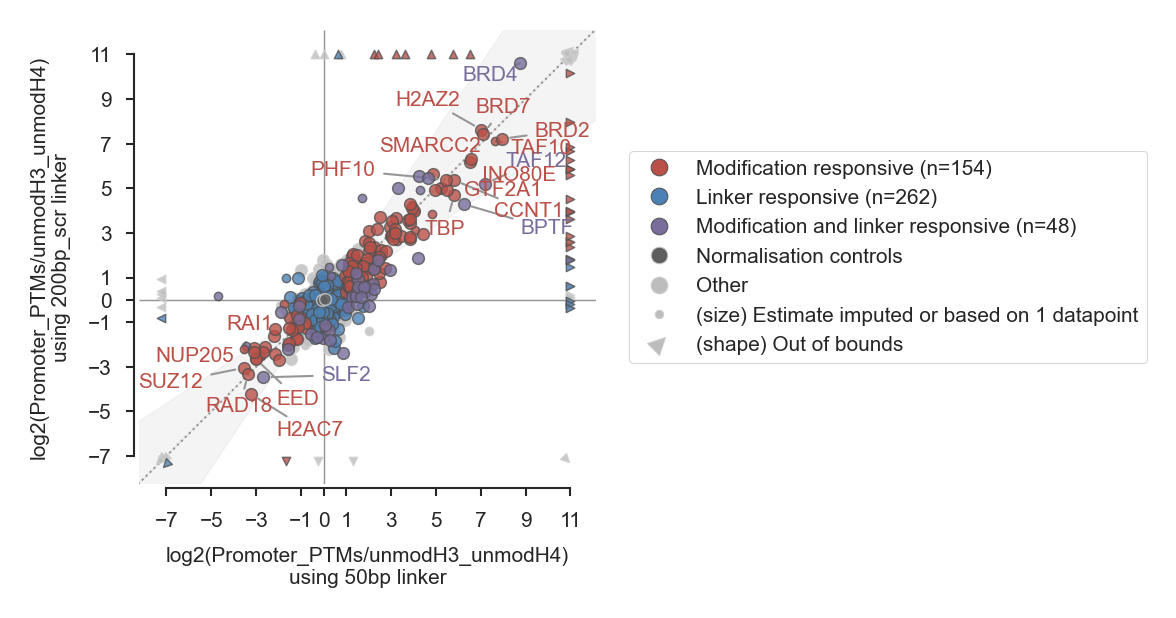

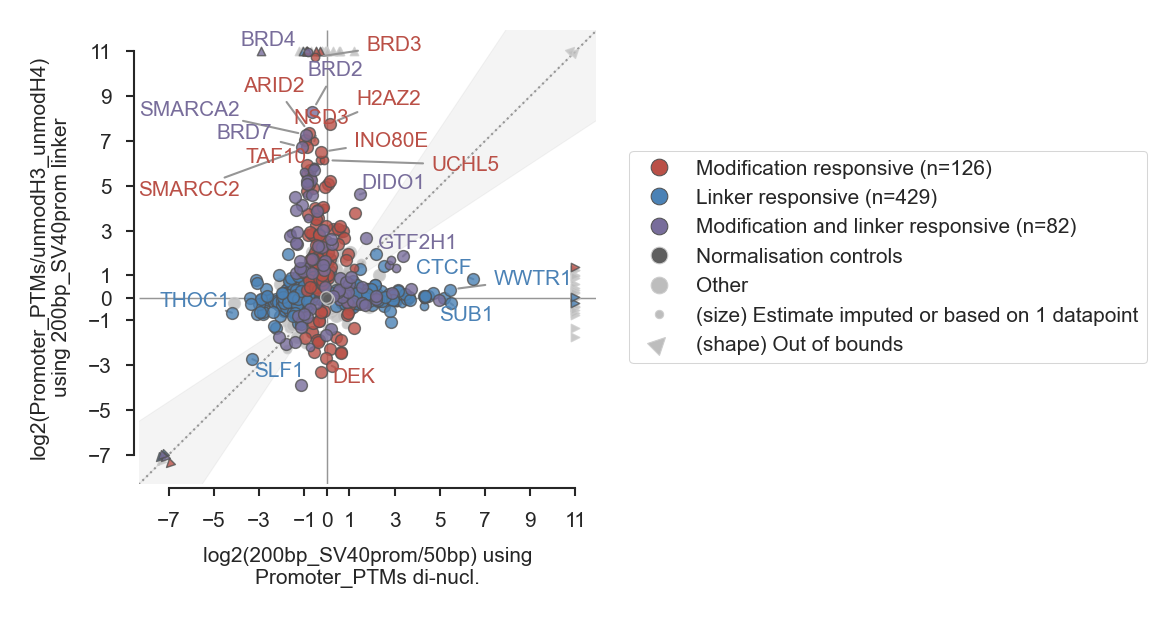

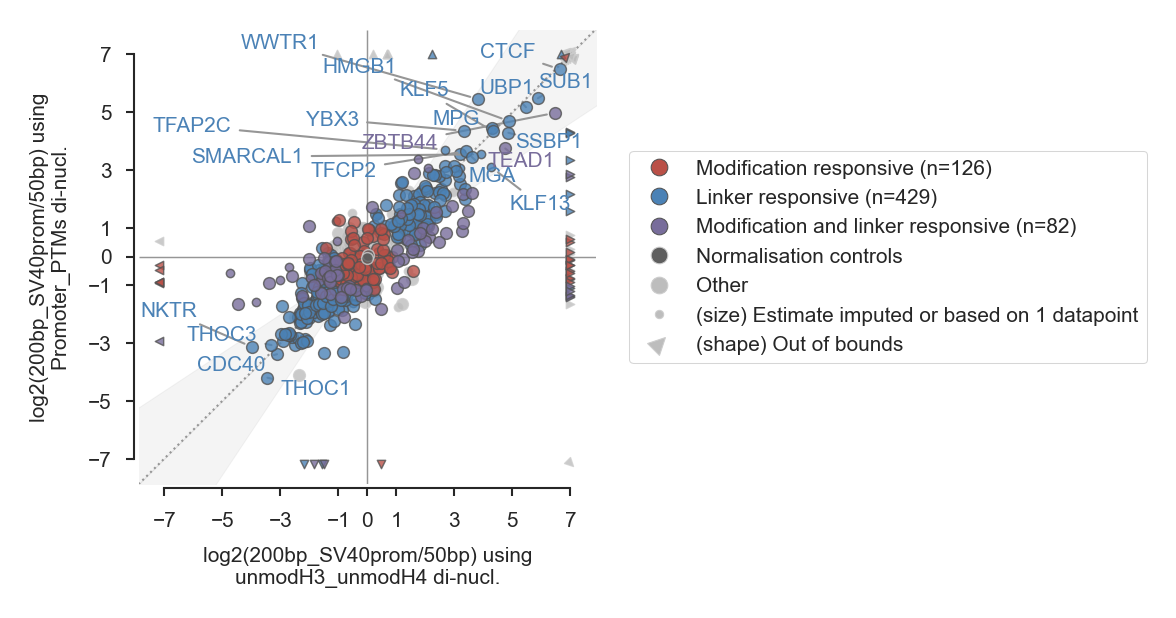

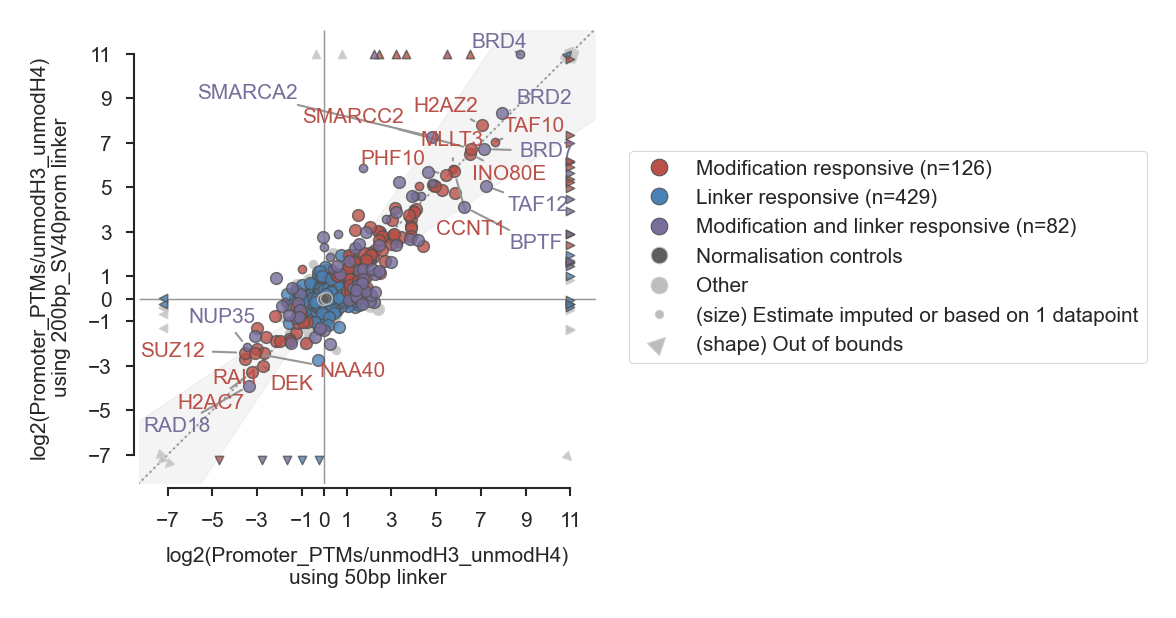

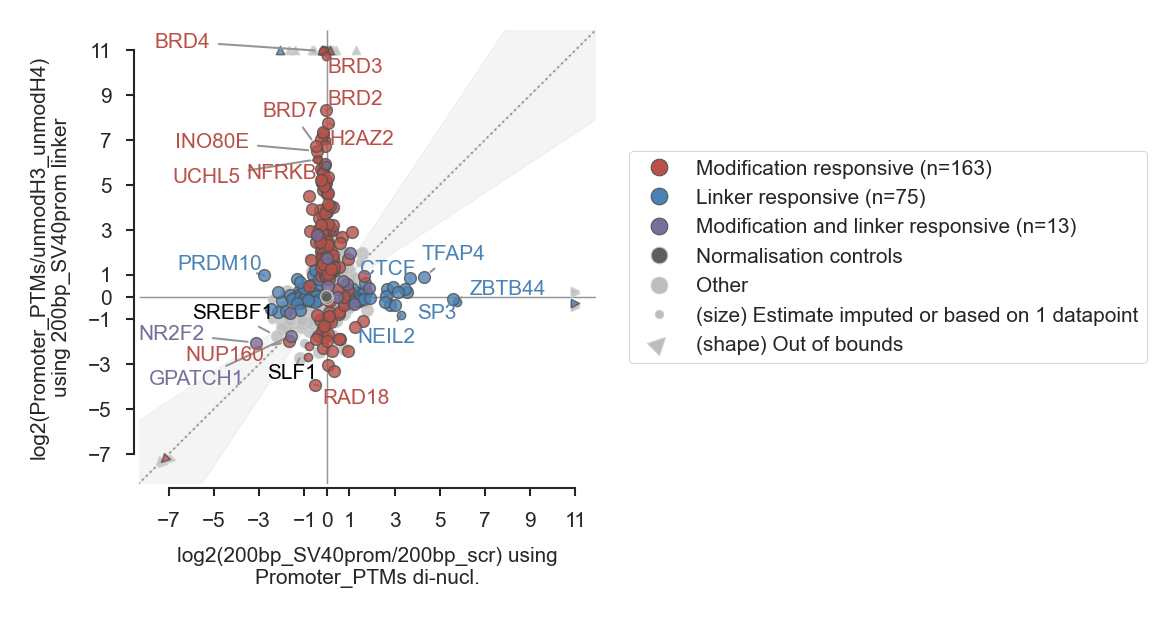

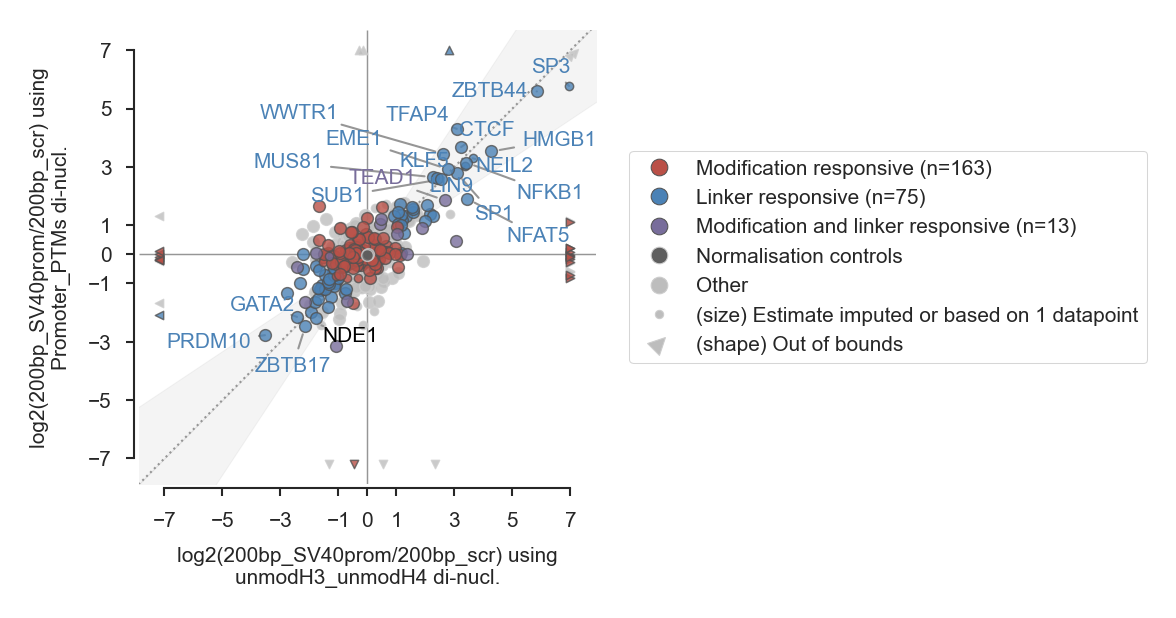

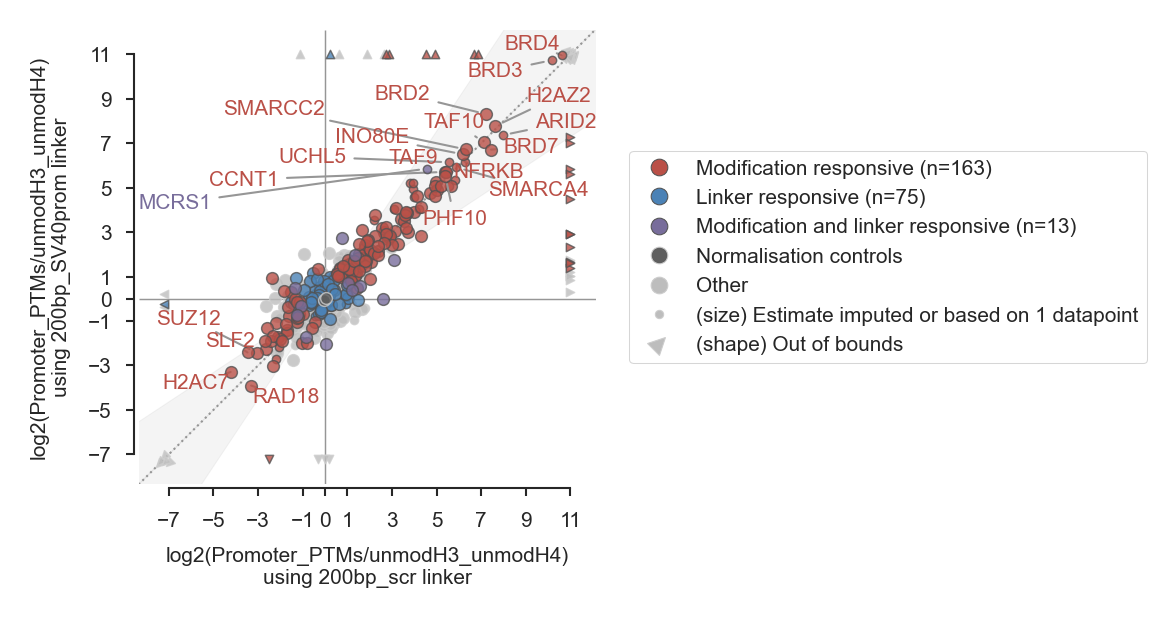

In [23]:
from sklearn.ensemble import IsolationForest

from numpy.random import RandomState
from matplotlib.lines import Line2D
from adjustText import adjust_text

approx_number_of_labels = 20

for plot_i, ((experiment, linker, __), (ref_experiment, ref_linker)) in enumerate(plot_combinations.items(), start=1):
    
    # print(experiment, linker, ref_experiment, ref_linker)
    # continue
    
    experiment_modif = f'modif_{experiment}_vs_{ref_experiment}_{linker}'
    experiment_linker = f'linker_{linker}_vs_{ref_linker}_{experiment}'
    
    experiment_ref_modif = f'modif_{experiment}_vs_{ref_experiment}_{ref_linker}'
    experiment_ref_linker = f'linker_{linker}_vs_{ref_linker}_{ref_experiment}'
    
    modif_significant = data_model_outputs[[(experiment_modif, SIGNIFICANT_COL), (experiment_ref_modif, SIGNIFICANT_COL)]].any(axis=1).fillna(False)
    linker_significant = data_model_outputs[[(experiment_linker, SIGNIFICANT_COL), (experiment_ref_linker, SIGNIFICANT_COL)]].any(axis=1).fillna(False)
    both_significant = modif_significant & linker_significant
    
    n_both_significant = both_significant.sum()
    n_modif_significant = modif_significant.sum() - n_both_significant
    n_linker_significant = linker_significant.sum() - n_both_significant
    
    plot_variants_available = [
        'modif_vs_linker_response'
    ]
    
    if experiment != ref_experiment:
        plot_variants_available.append('linker_response_vs_reference')
    if linker != ref_linker:        
        plot_variants_available.append('modif_response_vs_reference')

    
    for plot_variant in plot_variants_available:
        
        if plot_variant == 'modif_response_vs_reference':
            experiment_x = experiment_ref_modif
            experiment_y = experiment_modif
            xlabel = f'log2({experiment}/{ref_experiment}) using {ref_linker} linker'
            ylabel = f'log2({experiment}/{ref_experiment}) using {linker} linker'
            
        elif plot_variant == 'linker_response_vs_reference':
            experiment_x = experiment_ref_linker
            experiment_y = experiment_linker
            
            xlabel = f'log2({linker}/{ref_linker}) using {ref_experiment} di-nucl.'
            ylabel = f'log2({linker}/{ref_linker}) using {experiment} di-nucl.'
        elif plot_variant == 'modif_vs_linker_response':
            experiment_y = experiment_modif
            experiment_x = experiment_linker
            
            ylabel = f'log2({experiment}/{ref_experiment}) using {linker} linker'
            xlabel = f'log2({linker}/{ref_linker}) using {experiment} di-nucl.'
        else:
            raise NotImplementedError(f"{plot_variant=}")
    
        plot_df = {}

        axes = {'x': experiment_x, 'y': experiment_y}

        for prefix, col in axes.items():
            plot_df[f'{prefix}_value'] = data_model_outputs[col, 'logFC_imputed']
            plot_df[f'{prefix}_is_imputed'] =  data_model_outputs[col, 'logFC_is_imputed']
            plot_df[f'{prefix}_is_one_datapoint']= data_model_outputs[col, 'logFC_based_on_single_datapoint']
            # Make a special column to mark infinities
            plot_df[f'{prefix}_is_infinite'] = (~data_model_outputs[col, 'logFC_imputed'].isnull()) & (~data_model_outputs[col, 'logFC_imputed'].apply(np.isfinite))
 
        plot_df['modif_significant'] = modif_significant
        plot_df['linker_significant'] = linker_significant
        plot_df['modif_and_linker_significant'] = both_significant
    
        # Additionally, we would need to know which proteins were used in normalisation:
        plot_df['used_for_normalisation'] = comments.fillna('').str.contains('Used for normalisation')

        data_limits = {'x': DATA_LIMITS[DATASET][plot_variant], 'y': DATA_LIMITS[DATASET][plot_variant]}

        x_ticks = y_ticks = TICKS[DATASET][plot_variant]

        # random jitter width, in terms of fraction of data limits, 
        # the jitter is used only for diagonal boundary items so they don't overlap so much
        # all other out-of-bounds plots will be placed a jitter_max_offset away from the boundary
        jitter_amplitude = 0.025 
        jitter_max_offset_x = (data_limits['x'][1] - data_limits['x'][0])*jitter_amplitude/2
        jitter_max_offset_y = (data_limits['y'][1] - data_limits['y'][0])*jitter_amplitude/2

        effective_data_limits = {
            'x': (data_limits['x'][0] - jitter_max_offset_x, data_limits['x'][1] + jitter_max_offset_x),
            'y': (data_limits['y'][0] - jitter_max_offset_y, data_limits['y'][1] + jitter_max_offset_y),
        }

        # Finally, we would need to know which points are "out of bounds" of the limits (i.e. are infinite)
        for prefix in ['x', 'y']:
            plot_df[f'{prefix}_is_in_bounds'] = plot_df[f'{prefix}_value'].between(*effective_data_limits[prefix])

        # Combine this into one dataframe
        plot_df = pd.DataFrame(plot_df)

        # We can drop proteins without x/y values as we won't be able to plot anything for them anyway
        plot_df = plot_df.dropna(subset=['x_value', 'y_value'])

        # Add some summary columns:
        plot_df['any_one_datapoint'] = plot_df[['x_is_one_datapoint', 'y_is_one_datapoint']].fillna(False).any(axis=1)
        plot_df['any_imputed'] = plot_df[['x_is_imputed', 'y_is_imputed']].fillna(False).any(axis=1)
        plot_df['any_infinite'] = plot_df[['x_is_infinite', 'y_is_infinite']].fillna(False).any(axis=1)
        plot_df['any_oob'] = ~(plot_df[['x_is_in_bounds', 'y_is_in_bounds']].fillna(True).all(axis=1))
        

         # Finally, we need to identify outlier proteins that we should label, within the significant proteins in bounds
        _df_if = plot_df[plot_df['x_is_in_bounds'] & plot_df['y_is_in_bounds']]

        _if = IsolationForest(
            random_state=42, 
            contamination=np.clip(approx_number_of_labels/len(_df_if), 1e-5, 0.5)
        )
        _outliers = _if.fit_predict(_df_if[['x_value', 'y_value']])
        _outliers = pd.Series((_outliers == -1), index=_df_if.index, name='is_outlier')        
        plot_df = plot_df.join(_outliers)

        # And proteins to label, which should be:
        # - outlier proteins,
        plot_df['to_label'] = plot_df['is_outlier'].fillna(False) 
        # # Proteins used for normalisation
        # commented out because their labels take a lot of space but add little information
        # plot_df['to_label'] |= plot_df['used_for_normalisation'] 
        # -  Proteins with significant changes and oob enrichments
    #     plot_df['to_label'] |= plot_df['any_significant'] & plot_df['any_oob']

        # ---- Now figure out the aesthetics to use for each of the proteins-------

        # -- Colour and textcolour

        # Default to Background colour
        plot_df['colour'] = PALETTE['Background']
        plot_df['textcolour'] = PALETTE_TEXT['Background']
        # Mark normalisation proteins using controls colour
        plot_df.loc[plot_df['used_for_normalisation'], 'colour'] = PALETTE['Controls']
        plot_df.loc[plot_df['used_for_normalisation'], 'textcolour'] = PALETTE_TEXT['Controls']

        
        plot_df.loc[plot_df['modif_significant'], 'colour'] = PALETTE['Modification responsive']
        plot_df.loc[plot_df['modif_significant'], 'textcolour'] = PALETTE['Modification responsive']    
        
        plot_df.loc[plot_df['linker_significant'], 'colour'] = PALETTE['Linker responsive']
        plot_df.loc[plot_df['linker_significant'], 'textcolour'] = PALETTE['Linker responsive']  
        
        plot_df.loc[plot_df['modif_and_linker_significant'], 'colour'] = PALETTE['Modification and linker responsive']
        plot_df.loc[plot_df['modif_and_linker_significant'], 'textcolour'] = PALETTE['Modification and linker responsive']  

        # -- Z order is similar to colour

        # Background is 0
        plot_df['z_order'] = 1

        # Controls are 5
        plot_df.loc[plot_df['used_for_normalisation'], 'z_order'] = 5
        # Significant things are 3
        plot_df.loc[plot_df['modif_significant'], 'z_order'] = 3
        plot_df.loc[plot_df['linker_significant'], 'z_order'] = 3
    
        # Super significant are 4
        plot_df.loc[plot_df['modif_and_linker_significant'], 'z_order'] = 4
        
        # And everything we want to annotate gets +1
        plot_df.loc[plot_df['to_label'], 'z_order'] += 1

        plot_df['alpha'] = ALPHA

        # Default to background, and EDGEWIDTH
        plot_df['edgecolour'] = PALETTE_EDGES['background']
        plot_df['linewidth'] = EDGEWIDTH

        # For significant proteins add a darker border
        plot_df.loc[plot_df['modif_significant'].fillna(False), 'edgecolour'] = PALETTE_EDGES['highlight']
        plot_df.loc[plot_df['linker_significant'].fillna(False), 'edgecolour'] = PALETTE_EDGES['highlight']
        plot_df.loc[plot_df['modif_and_linker_significant'].fillna(False), 'edgecolour'] = PALETTE_EDGES['highlight']
        
        # -- Markersize: 

        # default to large
        plot_df['markersize'] = MARKERSIZES['large']

        # For imputed entries, or entries based on a single datapoint make it smaller
        plot_df.loc[
            plot_df['any_one_datapoint'], 
            'markersize'
        ] = MARKERSIZES['small']

        plot_df.loc[
            plot_df['any_imputed'], 
            'markersize'
        ] = MARKERSIZES['small']


        def figure_out_marker(row):

            _in_bounds = row[['x_is_in_bounds', 'y_is_in_bounds']].astype(bool)
            if _in_bounds.all():
                # If everything is in bounds, return 'o'
                return 'o'
            elif (~_in_bounds).all():
                # If nothing is in bounds
                # Let's figure out the direction
                if (row['x_value'] < data_limits['x'][0]) & (row['y_value'] < data_limits['y'][0]):
                    # Lower left
                    return 'diag-down-left'
                elif (row['x_value'] < data_limits['x'][0]) & (row['y_value'] > data_limits['y'][1]):
                    # Upper left
                    return 'diag-up-left'
                elif (row['x_value'] > data_limits['x'][1]) & (row['y_value'] < data_limits['y'][0]):
                    # Lower right
                    return 'diag-down-right'
                elif (row['x_value'] > data_limits['x'][1]) & (row['y_value'] > data_limits['y'][1]):
                    # Upper right
                    return 'diag-up-right'
                else:
                    raise Exception("this case should never be reached")
            elif ~_in_bounds['x_is_in_bounds']:
                # If only x is out of bounds, then depending on the coordinate
                # return either < or >
                if row['x_value'] < data_limits['x'][0]:
                    return '<'
                else:
                    return '>'
            elif ~_in_bounds['y_is_in_bounds']:
                # If only y is out of bounds, then depending on the coordinate
                # return either v or ^
                if row['y_value'] < data_limits['y'][0]:
                    return 'v'
                else:
                    return '^'
            else:
                raise Exception("This condition should not happen")

        plot_df['marker'] = plot_df.apply(figure_out_marker, axis=1)

        # -- Rasterization
        # Rasterize everything background and with standard marker
        plot_df['rasterized'] = (plot_df['colour'] == PALETTE['Background']) & (plot_df['marker'] == 'o')

        # --- Coordinates 

        # Just clip the x values by the data limits, markers will highlight the in/out of axes points
        plot_df['x_coord'] = plot_df['x_value'].clip(effective_data_limits['x'][0], data_limits['x'][1])
        plot_df['y_coord'] = plot_df['y_value'].clip(effective_data_limits['y'][0], data_limits['y'][1])


        # Add some jitter to the coordinates that are equal to maximum data limits
        _at_limits = ~(plot_df[['x_is_in_bounds', 'y_is_in_bounds']].astype(bool).any(axis=1))

        random = RandomState(45)

        plot_df.loc[_at_limits, 'x_coord'] += random.uniform(-jitter_max_offset_x, jitter_max_offset_x, size=_at_limits.sum())
        plot_df.loc[_at_limits, 'y_coord'] += random.uniform(-jitter_max_offset_y, jitter_max_offset_y, size=_at_limits.sum())
        
        
         # --------- LEGEND ---------------------------

        legend = [
            Line2D([0], [0], 
                   marker='o', color='none', label=f'Modification responsive (n={n_modif_significant:,})', 
                   markerfacecolor=PALETTE['Modification responsive'], markersize=MARKERSIZES['large'],
                   markeredgecolor=PALETTE_EDGES['highlight']),
            Line2D([0], [0], 
                   marker='o', color='none', label=f'Linker responsive (n={n_linker_significant:,})', 
                   markerfacecolor=PALETTE['Linker responsive'], markersize=MARKERSIZES['large'],
                   markeredgecolor=PALETTE_EDGES['highlight']),
            Line2D([0], [0], 
                   marker='o', color='none', label=f'Modification and linker responsive (n={n_both_significant:,})', 
                   markerfacecolor=PALETTE['Modification and linker responsive'], markersize=MARKERSIZES['large'],
                   markeredgecolor=PALETTE_EDGES['highlight']),
            Line2D([0], [0], 
                   marker='o', color='none', label=f'Normalisation controls',
                   markerfacecolor=PALETTE['Controls'], markersize=MARKERSIZES['large'],
                   markeredgecolor=PALETTE_EDGES['background']),
            Line2D([0], [0], 
                   marker='o', color='none', label='Other', 
                   markerfacecolor=PALETTE['Background'], markersize=MARKERSIZES['large'],
                   markeredgecolor=PALETTE_EDGES['background']),
            Line2D([0], [0], 
                   marker='o', color='none', label='(size) Estimate imputed or based on 1 datapoint', 
                   markerfacecolor=PALETTE['Background'], markersize=MARKERSIZES['small'],
                   markeredgecolor=PALETTE_EDGES['background']),
            Line2D([0], [0], 
                   marker=SPECIAL_MARKERS['diag-up-right'], color='none', label='(shape) Out of bounds', 
                   markerfacecolor=PALETTE['Background'], markersize=MARKERSIZES['large'],
                   markeredgecolor=PALETTE_EDGES['background']),
        ]

        # -------- Text for caption -----------

        out_of_bounds_text = []
        for ix, row in plot_df.loc[~plot_df[['x_is_in_bounds', 'y_is_in_bounds']].astype(bool).all(axis=1)].sort_index().iterrows():
            out_of_bounds_text.append('{}: (x={:.2f}, y={:.2f}, `modif_significant={}`, `linker_significant={}`)'.format(ix, row['x_value'], row['y_value'], row['modif_significant'], row['linker_significant']))

        out_of_bounds_text = '   - ' + ('\n   - '.join(out_of_bounds_text))

        fig = plt.figure(figsize=(10*FIVE_MM_IN_INCH, 10*FIVE_MM_IN_INCH))
        ax = plt.gca()

        ax.axhline(0, linestyle='-', color=AXIS_LINECOLOR, linewidth=EDGEWIDTH, zorder=0)
        ax.axvline(0, linestyle='-', color=AXIS_LINECOLOR, linewidth=EDGEWIDTH, zorder=0)

        texts = []

        for aesthetics, rows in plot_df.groupby([
            'to_label', 'colour', 'textcolour', 'z_order', 'alpha', 'edgecolour', 'linewidth', 'markersize', 'marker', 'rasterized'
        ]):
            to_label, colour, textcolour, z_order, alpha, edgecolour, linewidth, markersize, marker, rasterized = aesthetics

            if marker in SPECIAL_MARKERS:
                marker = SPECIAL_MARKERS[marker]

            ax.scatter(
                x=rows['x_coord'], y=rows['y_coord'], 
                color=colour, zorder=z_order, 
                alpha=alpha, edgecolor=edgecolour, 
                linewidth=linewidth,
                s=markersize,
                marker=marker,
                rasterized=rasterized,
            )

            if to_label:
                for ix, row in rows.iterrows():
                    texts.append(ax.text(row['x_coord'], row['y_coord'], ix, color=textcolour, zorder=plot_df['z_order'].max()))

        adjust_text(
            texts, 
            plot_df['x_coord'].values, plot_df['y_coord'].values, 
            ax=ax,
            force_points=(0.5, 0.5), 
            force_text=(0.25, 0.25),
            arrowprops=dict(arrowstyle='-', color=AXIS_LINECOLOR, linewidth=0.5)
        )
        ax.grid(False)

        _xlim = ax.get_xlim()
        _ylim = ax.get_ylim()

        _min = np.min([_xlim, _ylim])
        _max = np.max([_xlim, _ylim])


        ax.plot([_min, _max], [_min, _max], linestyle=':', linewidth=0.5, zorder=0, color=AXIS_LINECOLOR)
        ## Shading around diagonal  (positive/negative)
        angle_offset = 0.2 # Same as in other figures in main text
        # Diagonal shading
        absmax = np.max(np.abs([_xlim, _ylim]))
        line_drawing_limit = absmax * 2
        vector = np.asarray([1,1]) * line_drawing_limit
        shading_dict = dict(color='#969696', alpha=.1, zorder=0)

        for sign_symmetry in [-1.0, 1.0]:
            for sign_angle in [-1.0, 1.0]:
                rotated_vector = rotate_by_angle(sign_symmetry * vector, sign_symmetry * sign_angle * angle_offset)  

                ax.fill_between(
                    [0, rotated_vector[0]],
                    [0, rotated_vector[0]],
                    [0, rotated_vector[1]],
                    **shading_dict,
                )

        ax.set_xlim(_xlim)
        ax.set_ylim(_ylim)
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)

        ax.set_xlabel('\n'.join(textwrap.wrap(xlabel, 40)))
        ax.set_ylabel('\n'.join(textwrap.wrap(ylabel, 40)))

        ax.legend(handles=legend, loc='center left', bbox_to_anchor=(1.05, 0.5), markerscale=0.5)

        sns.despine(ax=ax, offset=1, trim=True)


        _fname = OUTPUT_DIRECTORY / f'01-scatterplot-{DATASET}-{plot_i:02d}-{plot_variant}-{experiment}_{linker}.pdf'
        _caption = f"""
Scatterplot of the log2 differences in protein responses in the experimental conditions.
On the x axis, {xlabel} is plotted. On the y axis {ylabel} is plotted.

Each marker corresponds to a protein in the dataset. The colour of the markers indicates the classification of proteins into:

1. Modification-responsive (red), i.e. proteins which exhibit a statistically significant and strong effect in `{experiment_modif}` or `{experiment_ref_modif}`.
2. Linker-responsive (blue), i.e. proteins which exhibit a statistically significant and strong effect in `{experiment_linker}` or `{experiment_ref_linker}`.
3. Modification and linker responsive (purple), i.e. proteins which exhibit 1 and 2 above.

Proteins highlighted in grey correspond to the normalisation controls.
Smaller marker sizes indicate effect estimates that were made on a single datapoint only.
Triangular markers indicate presence of proteins which are out of axis bounds.

Such proteins are listed below:

{out_of_bounds_text}
        """
        plt.savefig(_fname, bbox_inches='tight', dpi=DPI)
        with open(str(_fname) + '.caption.md', 'w') as f:
            f.write(_caption)
            print(_caption)

        plot_df.to_csv(str(_fname) + '.plot_data.csv')

#         break